In [1]:
import requests
import pandas as pd
import json

## 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [18]:
base_url = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
year_str = '?year=2016'
search_text = '&query_text=fire'

In [19]:
response = requests.get(base_url+year_str+search_text)

In [20]:
response = response.json()


In [21]:
response

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [22]:
len(response)

12

In [23]:
result = []
for i in response:
    result.append((i['month_name'], int(i['query_count'])))
result

[('January', 19),
 ('February', 35),
 ('March', 32),
 ('April', 26),
 ('May', 24),
 ('June', 31),
 ('July', 24),
 ('August', 47),
 ('September', 36),
 ('October', 38),
 ('November', 32),
 ('December', 38)]

## 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [45]:
filter_c = "?$where=query_count>100&$limit=10000"

In [46]:
response = requests.get(base_url+filter_c)

In [47]:
response.json()

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [48]:
len(response.json())

1262

## 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [53]:
codes_q = "?query_text=codes&$where=query_count>100&$limit=10000"

In [54]:
response = requests.get(base_url+codes_q)

In [55]:
response

<Response [200]>

In [57]:
len(response.json())

56

## 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [61]:
top500 = "?$order=query_count DESC&$limit=500"

In [62]:
response = requests.get(base_url+top500)

In [63]:
response

<Response [200]>

In [64]:
response.json()

[{'month_name': 'October',
  'month': '10',
  'year': '2020',
  'query_text': '><h1>PAMPEIPOW</h1>\t20\r\nOctober\t10\t2020\tEarly Vote\t20\r\nOctober\t10\t2020\tlog in\t20\r\nOctober\t10\t2020\tproperty owner\t20\r\nOctober\t10\t2020\treal estate taxes\t20\r\nOctober\t10\t2020\tbenefit board\t19\r\nOctober\t10\t2020\tBuilding codes\t19\r\nOctober\t10\t2020\tccc\t19\r\nOctober\t10\t2020\tmask\t19\r\nOctober\t10\t2020\tinmate locator\t19\r\nOctober\t10\t2020\tinspections\t19\r\nOctober\t10\t2020\tinsurance\t19\r\nOctober\t10\t2020\tReal property tax\t19\r\nOctober\t10\t2020\tsalaries\t19\r\nOctober\t10\t2020\tpaystub\t19\r\nOctober\t10\t2020\tstaff\t19\r\nOctober\t10\t2020\ttraffic tickets\t19\r\nOctober\t10\t2020\tbrush pickup\t18\r\nOctober\t10\t2020\tassessor of\t18\r\nOctober\t10\t2020\tArrest records\t18\r\nOctober\t10\t2020\tabsentee voting\t18\r\nOctober\t10\t2020\tcovid heat map\t18\r\nOctober\t10\t2020\tcrash report\t18\r\nOctober\t10\t2020\tconvience centers\t18\r\nOctober\t10

In [68]:
maps_q = "?query_text=maps&$limit=10000"

In [69]:
response_m = requests.get(base_url+maps_q)

In [71]:
response_m = pd.DataFrame(response_m.json())

In [72]:
response_m

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
77,November,2020,86,maps,11
78,December,2020,113,maps,12
79,March,2021,132,maps,3
80,April,2021,148,maps,4


In [77]:
response_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   82 non-null     object
 1   year         82 non-null     object
 2   query_count  82 non-null     int64 
 3   query_text   82 non-null     object
 4   month        25 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.3+ KB


In [76]:
response_m['query_count'] = pd.to_numeric(response_m['query_count'])

In [80]:
import seaborn as sns
from matplotlib import pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

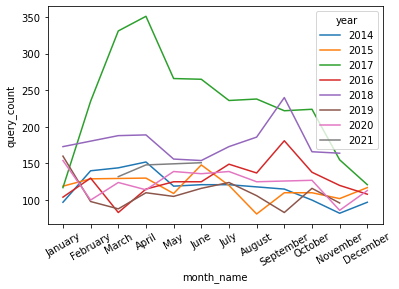

In [81]:
ax = sns.lineplot(data=response_m, x='month_name', y='query_count', hue='year')
plt.xticks(rotation=30)